In [1]:
from diagnostics import *
%matplotlib inline

In [58]:
# get data
self = loadpickle('Results/TOIsensitivity27vettv2_mult2_planet00027_iteration012/Sensitivity_class')

Stellar parameters:
Tmag     = 10.962
Ms       = 0.472
Rs       = 0.445
Teff     = 3609
sig_phot = 505.9 ppm

2 injected planets:
P  [days] = 1.543, 18.714
rp        = 2.35, 1.94
rp/Rs     = 0.04837, 0.03987
(rp/Rs)^2 = 2339.386674, 1589.759741 ppm
detected  = 1, 0

0 false positives:
P [days] = 


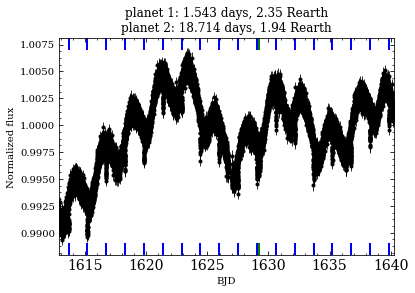

In [59]:
#
plot_raw_LC(self)

Stellar parameters:
Tmag     = 10.962
Ms       = 0.472
Rs       = 0.445
Teff     = 3609
sig_phot = 505.9 ppm

2 injected planets:
P  [days] = 1.543, 18.714
rp        = 2.35, 1.94
rp/Rs     = 0.04837, 0.03987
(rp/Rs)^2 = 2339.386674, 1589.759741 ppm
detected  = 1, 0

0 false positives:
P [days] = 


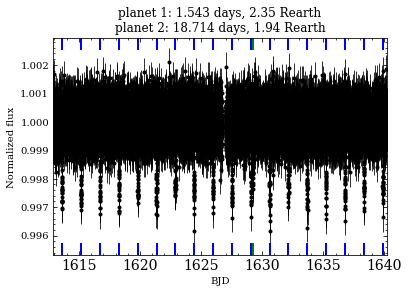

In [63]:
#
plot_corrected_LC(self)

Stellar parameters:
Tmag     = 10.962
Ms       = 0.472
Rs       = 0.445
Teff     = 3609
sig_phot = 505.9 ppm

2 injected planets:
P  [days] = 1.543, 18.714
rp        = 2.35, 1.94
rp/Rs     = 0.04837, 0.03987
(rp/Rs)^2 = 2339.386674, 1589.759741 ppm
detected  = 1, 0

0 false positives:
P [days] = 


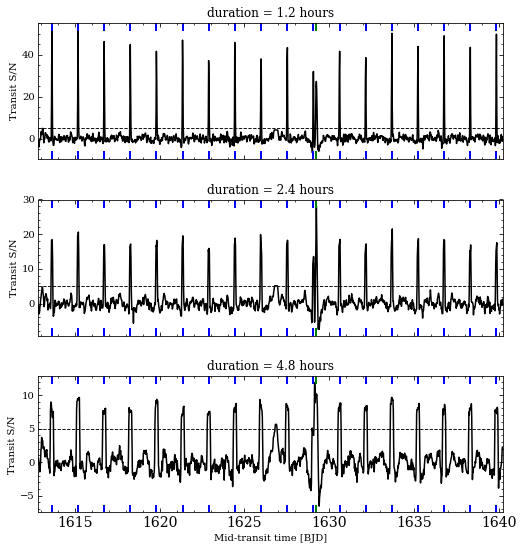

In [65]:
#
plot_transit_search(self, log=0)

In [56]:
#
report_failed_planet_candidates(self)

Period = 1.722 days
is median flux in-transit significantly deeper than out of transit?
True
is transit depth S/N greater than the required threshold?
True

Period = 7.462 days
is median flux in-transit significantly deeper than out of transit?
True
is transit depth S/N greater than the required threshold?
True

Period = 12.589 days
is median flux in-transit significantly deeper than out of transit?
True
is transit depth S/N greater than the required threshold?
True

Period = 14.137 days
is median flux in-transit significantly deeper than out of transit?
True
is transit depth S/N greater than the required threshold?
True

Period = 21.629 days
is median flux in-transit significantly deeper than out of transit?
True
is transit depth S/N greater than the required threshold?
False



In [57]:
#
check_confirm_transits(self, 3, 3, .5)

Confirming proposed transits...
0.0
0.2
0.4
0.6
0.8


(array([[1.72192824e+00, 1.63104008e+03, 9.98568177e-04, 5.08713332e-02],
        [7.46151819e+00, 1.62472630e+03, 6.56390888e-04, 6.25730860e-02],
        [1.25887319e+01, 1.62813156e+03, 7.74900211e-04, 7.10771706e-02],
        [1.41368897e+01, 1.63828957e+03, 8.01280489e-04, 7.29424378e-02],
        [2.16285819e+01, 1.63964946e+03, 8.50347901e-04, 8.11712694e-02]]),
 array([[1.72192801e+00, 1.63104008e+03, 9.99282750e-04, 5.08491515e-02]]),
 array([161825.91355246]),
 array([ True,  True,  True,  True,  True]),
 array([ True,  True,  True,  True,  True]),
 array([ True, False, False, False, False]))

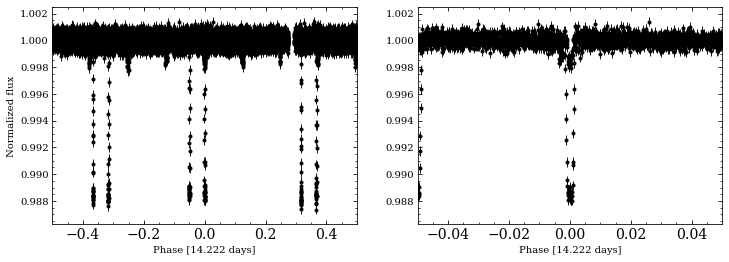

In [50]:
i = 1
plot_phased_LC(self, self.params_guess_priorto_confirm[i,0], self.params_guess_priorto_confirm[i,1])